In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [5]:
fraud=df[df['Class']==1]
not_fraud=df[df['Class']==0]
print('We have  '+ str(len(fraud)) + ' transactions and ' + str(len(not_fraud)) + ' valid transactions ')

We have  492 transactions and 284315 valid transactions 


Text(0, 0.5, 'Frequency')

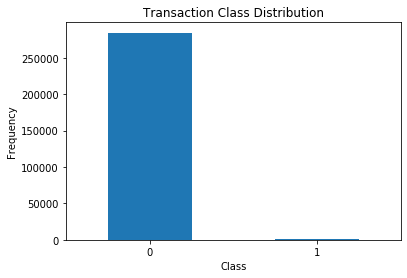

In [6]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2))
plt.xlabel("Class")
plt.ylabel("Frequency")

In [7]:
print('Average amount of fraud transactions '+ str(((fraud['Amount'].sum()/len(fraud)))))

Average amount of fraud transactions 122.21132113821139


In [8]:
print('Average amount of valid transactions '+ str(((not_fraud['Amount'].sum()/len(not_fraud)))))

Average amount of valid transactions 88.29102242231328


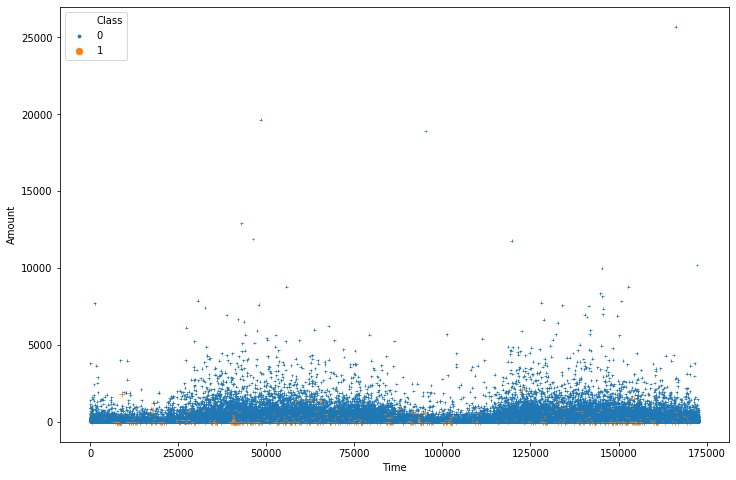

In [9]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df["Time"], y=df["Amount"],
                hue=df["Class"], size=df["Class"], sizes=(40, 8), marker="+")
plt.show()

In [10]:
features=df.drop(['Class'],axis=1)

In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(features)


In [12]:
labels=df['Class']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(features, labels, test_size=0.3, stratify=labels) #validation = to check for overfitting; if overfit = regularize #so now our working data is 305 points. we had original 339 - 33.9 (1% of 339) = 305
features = X_train

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_train = pca.fit_transform(X_train)
X_validation = pca.fit_transform(X_validation)

In [18]:
from sklearn import preprocessing, neighbors
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train,y_train)

accuracy = clf.score(X_validation,y_validation)
print(accuracy*100)

99.82795547909133


In [21]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(X_train,y_train)

accuracy = lgr.score(X_validation,y_validation)
print(accuracy*100)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


99.80805917395223
